In [39]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=128159 sha256=1bd3b00eaeb4a6618a2d70e2bfaa27a730934aa3b7337e8477b66ff0bed080dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-ee5hrjoj/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
T = [0,5]
nb_node = 5
prob = 0.1
S = sg.erdos_renyi_discrete(T, nb_node,prob)
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  15
Nb of segmented links :  19.0
Nb of event times :  6


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


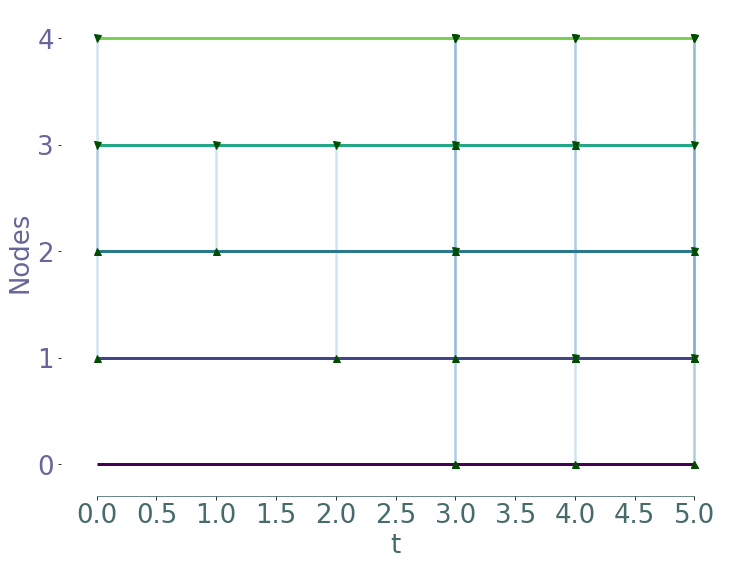

In [4]:
S.plot()

In [5]:
import straph.paths.meta_walks as mw
import operator
b = operator.lt
walk_type = "active"
fun =  mw.Metawalk.co_sfp

In [6]:
bt.to_undirected(S)

In [7]:
SS = S.stream_graph_to_link_stream()

In [8]:
SS.write_to_matthieu_link_stream("any")

In [23]:
exact_between, betweenness ,features, general_contri = bt.betweenness_all_dis_gen(S, b, fun, walk_type, approx = -1)

0 out of 5
finish optimal paths 1.8310546875e-05
finish predecessor 2.110004425048828e-06 size pred 14
remove and ordrered 9.330113728841146e-06 new size 14
finish sigma
finish sigma_r, sigma_tot 2.276897430419922e-06
finish delta
finish contribution 1.4821688334147136e-06
1 out of 5
finish optimal paths 2.1835168202718098e-05
finish predecessor 2.300739288330078e-06 size pred 16
remove and ordrered 1.0156631469726563e-05 new size 16
finish sigma
finish sigma_r, sigma_tot 1.8000602722167968e-06
finish delta
finish contribution 1.5020370483398437e-06
2 out of 5
finish optimal paths 2.5371710459391277e-05
finish predecessor 2.304712931315104e-06 size pred 20
remove and ordrered 1.1599063873291015e-05 new size 20
finish sigma
finish sigma_r, sigma_tot 2.2411346435546876e-06
finish delta
finish contribution 1.9192695617675783e-06
3 out of 5
finish optimal paths 2.5602181752522788e-05
finish predecessor 4.291534423828125e-06 size pred 20
remove and ordrered 1.0327498118082683e-05 new size 2

In [24]:
import time
start = time.time()
bt.simulations_dis_gen(SS, "papier", b, fun, walk_type)
end = time.time()

0 out of 5
finish optimal paths 2.2113323211669922e-05
finish predecessor 2.1497408548990887e-06 size pred 14
remove and ordrered 9.779135386149088e-06 new size 14
finish sigma
finish sigma_r, sigma_tot 2.1219253540039063e-06
finish delta
finish contribution 1.5934308369954428e-06
1 out of 5
finish optimal paths 2.1187464396158853e-05
finish predecessor 2.4517377217610677e-06 size pred 16
remove and ordrered 9.878476460774739e-06 new size 16
finish sigma
finish sigma_r, sigma_tot 1.8914540608723959e-06
finish delta
finish contribution 1.4623006184895834e-06
2 out of 5
finish optimal paths 2.8173128763834637e-05
finish predecessor 2.3086865743001303e-06 size pred 20
remove and ordrered 1.1150042215983073e-05 new size 20
finish sigma
finish sigma_r, sigma_tot 1.8874804178873699e-06
finish delta
finish contribution 1.8517176310221354e-06
3 out of 5
finish optimal paths 2.3996829986572267e-05
finish predecessor 2.360343933105469e-06 size pred 20
remove and ordrered 1.008907953898112e-05 ne

In [25]:
print(end-start)

0.02493453025817871


In [26]:
bet_moi = bt.read_dictionary("papier_betweenness.pic")

In [27]:
import os
cmd = 'mv any_mat.ls archive_code/Test'
os.system(cmd)

256

In [28]:
import time
start = time.time()
import os
cmd = 'python2 archive_code/betweenness_all.py Test/any_mat.ls -1 res'
os.system(cmd)
end = time.time()

In [29]:
bet_mat = bt.read_dictionary("res_betweenness.pic")

In [30]:
bet_mat

{'1': {0.0: 0.0, 1.0: 0.0, 2.0: 11.0, 3.0: 29.0, 4.0: 25.0, 5.0: 0.0},
 '0': {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 3.0: 44.0, 4.0: 14.0, 5.0: 0.0},
 '3': {0.0: 0.0, 1.0: 9.0, 2.0: 11.0, 3.0: 39.0, 4.0: 13.0, 5.0: 0.0},
 '2': {0.0: 0.0, 1.0: 9.0, 2.0: 0.0, 3.0: 52.0, 4.0: 0.0, 5.0: 0.0},
 '4': {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 3.0: 64.0, 4.0: 14.0, 5.0: 0.0}}

In [31]:
bet_moi

{'0': {0: 0.0, 1: 0.0, 2: 0.0, 3: 4.0, 4: 1.0, 5: 3.0},
 '1': {0: 0.3333333333333333,
  1: 0.0,
  2: 0.8333333333333333,
  3: 0.6666666666666666,
  4: 2.5,
  5: 3.6666666666666665},
 '2': {0: 0.5, 1: 1.0, 2: 0.0, 3: 3.5, 4: 0.0, 5: 3.0},
 '3': {0: 0.3333333333333333,
  1: 1.0,
  2: 0.8333333333333333,
  3: 3.0,
  4: 1.8333333333333333,
  5: 1.0},
 '4': {0: 0.5,
  1: 0.0,
  2: 0.0,
  3: 3.1666666666666665,
  4: 1.6666666666666665,
  5: 2.6666666666666665}}

In [32]:
for v in bet_moi.keys():
    for t in bet_moi[v].keys():
        if (v.lower() in bet_mat ):
            if not (abs(bet_moi[v][t] - bet_mat[v.lower()][t]) < 1/100):
                print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])

erreur  0 3 =>    4.0 44.0
erreur  0 4 =>    1.0 14.0
erreur  0 5 =>    3.0 0.0
erreur  1 0 =>    0.3333333333333333 0.0
erreur  1 2 =>    0.8333333333333333 11.0
erreur  1 3 =>    0.6666666666666666 29.0
erreur  1 4 =>    2.5 25.0
erreur  1 5 =>    3.6666666666666665 0.0
erreur  2 0 =>    0.5 0.0
erreur  2 1 =>    1.0 9.0
erreur  2 3 =>    3.5 52.0
erreur  2 5 =>    3.0 0.0
erreur  3 0 =>    0.3333333333333333 0.0
erreur  3 1 =>    1.0 9.0
erreur  3 2 =>    0.8333333333333333 11.0
erreur  3 3 =>    3.0 39.0
erreur  3 4 =>    1.8333333333333333 13.0
erreur  3 5 =>    1.0 0.0
erreur  4 0 =>    0.5 0.0
erreur  4 3 =>    3.1666666666666665 64.0
erreur  4 4 =>    1.6666666666666665 14.0
erreur  4 5 =>    2.6666666666666665 0.0


In [33]:
#contribution check
node = 0

In [34]:
import os
cmd = 'python2 archive_code/betweenness_tout.py Test/any_mat.ls -1 ' + S.node_to_label[node].lower() + " cont"
os.system(cmd)

0

In [35]:
cont_mat = bt.read_dictionary("cont_contri.pic")

In [38]:
for v in general_contri[node].keys():
    for t in general_contri[node][v].keys():
        if S.node_to_label[v].lower() in cont_mat:
            if abs(general_contri[node][v][t] - cont_mat[S.node_to_label[v].lower()][t]) > 1/100:
                print("erreur ",v,t,"=>   ", "(",general_contri[node][v][t],")" ,cont_mat[S.node_to_label[v].lower()][t])

erreur  3 4 =>    ( 0.0 ) 1.0
erreur  3 3 =>    ( 1.0 ) 10.0
erreur  2 3 =>    ( 1.0 ) 10.0
erreur  1 5 =>    ( 0.5 ) 0.0
erreur  1 4 =>    ( 0.5 ) 7.0
erreur  1 3 =>    ( 0.0 ) 3.0
erreur  0 5 =>    ( 1.5 ) 0.0
erreur  0 4 =>    ( 0.5 ) 7.0
erreur  0 3 =>    ( 2.0 ) 20.0
erreur  4 5 =>    ( 1.0 ) 0.0
erreur  4 4 =>    ( 0.0 ) 2.0
erreur  4 3 =>    ( 0.0 ) 8.0


In [27]:
import os
import time
cmd = 'python2 archive_code/betweenness_memoise.py Test/any_mat.ls -1 res'
print (cmd)
start = time.time()
os.system(cmd)
end = time.time()

python2 archive_code/betweenness_memoise.py Test/any_mat.ls -1 res
archive_code
[4.292341331544192, 18.153630976219148, 38.48480346296546, 39.57106229598435, 39.60586144005707, 40.557407966832145, 43.09224693979919, 44.14298861436873, 44.72548613914977, 46.991767362739246, 47.34837121915008, 47.66884766318105, 48.56635134337624, 48.607816129292, 49.01203120834529, 49.20304042384861, 49.310494682413456, 49.414397263265954, 49.89598570734869, 51.309946463221046, 51.337771148792214, 51.76492403245176, 51.779898563376214, 51.839418982888844, 52.98648925735928, 53.19309851232062, 55.299129757202024, 57.924940214582506, 58.19902372623584, 58.39264998002975, 58.74243354280465, 59.13730644314801, 60.0992644160528, 61.65676184746454, 62.803568346090174, 64.63288736923437, 65.9824505576728, 66.38669531203955, 67.21937010220222, 68.64316344428731, 69.13768230673543, 69.37063416569096, 69.86908611676219, 70.82750479037168, 70.8320893995261, 73.08569412608865, 73.20769555737274, 73.82852014701292, 

In [28]:
print(end-start)

281.2585198879242


In [34]:
SS.write_to_sg("examples/erdos8")

In [3]:
pow(2.0,(1/12))

1.0594630943592953

In [4]:
for i in range(4):
    for j in range(4):
        if i==1 and j==1:
            break
        print(i,j)

0 0
0 1
0 2
0 3
1 0
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
